In [11]:
import os
import glob
from scipy.spatial import distance as dist
import cv2
import dlib
import pandas as pd
import imutils
from numpy import dstack
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from math import sqrt
import csv
from keras.models import Sequential
from keras.layers import Bidirectional,Activation
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import LSTM
from keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.optimizers import SGD
from numpy import loadtxt
from keras.models import load_model
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode
from google.colab.patches import cv2_imshow





In [6]:


def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [12]:
# Load the detector
detector = dlib.get_frontal_face_detector()

# Load the predictor
predictor = dlib.shape_predictor("oculAI/face_features/shape_predictor_68_face_landmarks.dat")

# read the image
#This line for getting the image from your webcam
#cap = cv2.VideoCapture(0)
cap = cv2.VideoCapture('oculAI/blink_detection_demo.mp4')

cols = [str(n) for n in range(0, 68)]
df_points = pd.DataFrame(columns=cols)

frame = 0

while True:
    frame += 1
    ret, frame = cap.read()
    if not ret:
        break
    # Convert image into grayscale
    gray = cv2.cvtColor(src=frame, code=cv2.COLOR_BGR2GRAY)

    # Use detector to find landmarks
    faces = detector(gray)

    for face in faces:
        x1 = face.left()  # left point
        y1 = face.top()  # top point
        x2 = face.right()  # right point
        y2 = face.bottom()  # bottom point

        # Create landmark object
        landmarks = predictor(image=gray, box=face)

        face_featu_dict = {}
        # Loop through all the points

        for n in range(0, 68):
            x = landmarks.part(n).x
            y = landmarks.part(n).y

            # Draw a circle
            cv2.circle(img=frame, center=(x, y), radius=3, color=(0, 255, 0), thickness=-1)
            # Saving the coordinates from all the points in a dictionary

            face_featu_dict[str(n)] = landmarks.part(n)
        #adding a row with the info about all the points
        df_points = df_points.append(pd.DataFrame.from_records([face_featu_dict]), ignore_index=True)



        # show the image
        cv2.imshow(winname="Face", mat=frame)

        # Exit when escape is pressed
        if cv2.waitKey(delay=1) == 27:
            break


# When everything done, release the video capture and video write objects
cap.release()

# Close all windows
cv2.destroyAllWindows()

# saving the df with all the info about the points
if not df_points.empty:
    df_points.to_csv('oculAI/face_features/output_csv/face_features.csv')

AttributeError: ignored

<IPython.core.display.Javascript object>

Saved to photo.jpg


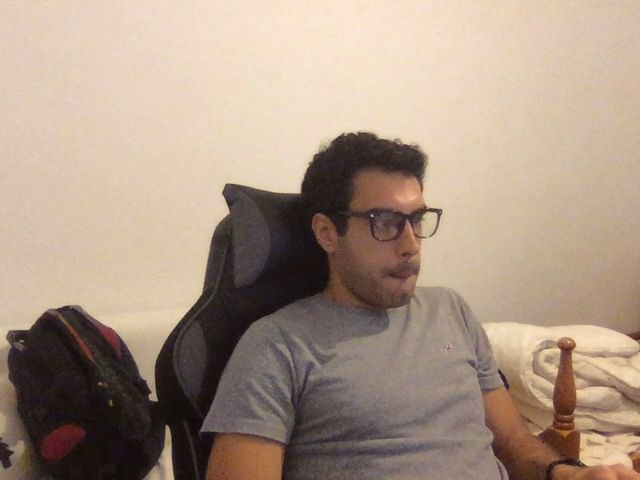

In [ ]:
# load model
model = load_model('/content/drive/My Drive/ProyectoSaturdaysAI - IV Edición/best_model.h5')

In [ ]:
y_predict = model.predict(X_test)

print(y_predict)